# Workshop 11


You should all have received feedback from you data projects.  
Let me know if you have any questions or want something elaborated.


# Plan for today
- Optimizing convex and non-convex functions
- Dynamic model
- Linear interpolation
- Problem set 7

# Optimizing 

See lecture 11 for guidance.

First part deals with evaluating different **optimization** methods under convex and non-convex (noisy) objective functions.  
We are wworking with:  
- Nelder-mead (*robust to noise in objective function*)  
- BFGS and Newton-CG (*quick and precise on smooth objective functions*)

See the gif from workshop 4 for a visualization of the Nelder-mead method.
BFGS and Newton-CG are both based on Newtons method see workshop 9 for a visualization and code.

The **takeaway** is that under a *noisy objective function*, which has **local minimas**, you are not guaranteed to converge to the **global minimum**. The initial guess has great importance and a **multistart** optimization could be appropriate. 

## Dynamic model

In the exam of 2020 and 2021 you should solve a dynamic model, good investment of time!  


### Dynamic 2-period problem:  
\begin{aligned}
v_{1}(m_{1}) & = 
\max_{c_{1}}\frac{c_{1}^{1-\rho}}{1-\rho}+\beta\mathbb{E}_{1}\left[v_2(m_2)\right]\\
m_2 &= (1+r)(m_{1}-c_{1})+y_{2} \\
y_{2} &= \begin{cases}
1-\Delta & \text{with prob. }0.5\\
1+\Delta & \text{with prob. }0.5 
\end{cases}\\
v_{2}(m_{2}) &= \max_{c_{2}}\frac{c_{2}^{1-\rho}}{1-\rho}+\nu\frac{(m_{2}-c_{2}+\kappa)^{1-\rho}}{1-\rho} \\
\end{aligned}

The agents derive utility from **consumption** but also leaving a **bequest**.  
Consumption decisions in period 2, $c_2$, relies on cash on hands in period 2, $m_2$, as well as (uncertain) income, $m_2 = (1+r)(m_1-c_1)+y_2)$.  
In period 2, the spending decisions is tied to the amount of cash-on-hand, $m_2$. Cash-on-hand in period 2 relies on the leftover asset from period 1, $m_1-c_1$.  
The consumer should take this into account when making spending decisions in period 1!  

Solve the model using *backwards induction*. Solve $v_{2}(m_{2})$ for a finite $m_2$-grid and then solve $v_{1}(m_{1})$ with *interpolated* $v_{2}(m_{2})$-function as input.

# Linear interpolation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate



In [2]:
# function to interpolate
f = lambda x: (x-3)**3 - 3*x**2 + 5*x
G = np.linspace(-5,10,6) # vector with just 6 points
F = f(G) # evaluate function in those 6 points



In [3]:

# construct interpolation function
interp_func = interpolate.RegularGridInterpolator([G],F,
                                                  bounds_error=False,
                                                  fill_value=None)


In [4]:
# interpolate based on grid
grid = np.linspace(-7,12,500)
interp_values = interp_func(grid)



In [5]:
# evaluate true values
true_values = f(grid)



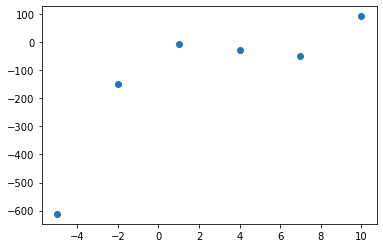

In [6]:
# Plot known points
plt.plot(G,F,'o',label='known points');


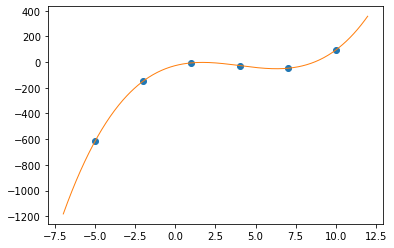

In [7]:
plt.plot(G,F,'o',label='known points') # Plot known points
plt.plot(grid,true_values,'-',lw=1,label='true function'); # Plot true function


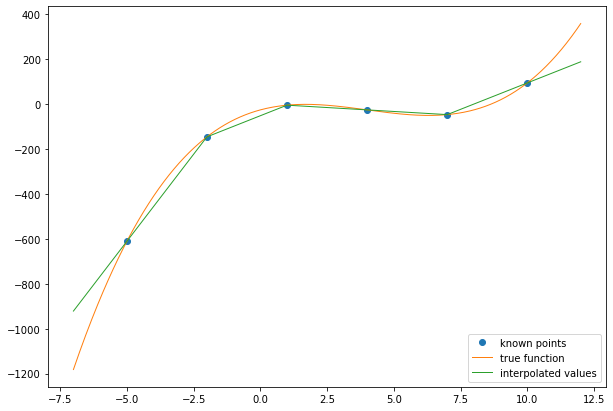

In [8]:
# define figure and axis
fig = plt.figure(figsize = (10,7)) 
ax = fig.add_subplot(1,1,1)

ax.plot(G,F,'o',label='known points') # Plot known points
ax.plot(grid,true_values,'-',lw=1,label='true function') # Plot true function
ax.plot(grid,interp_values,'-',lw=1,label='interpolated values') # Plot interpolated values
ax.legend(loc='lower right',facecolor='white',frameon=True) # legend
plt.savefig('linear_interpolation.png'); # save fig

# Problem set 7